<a href="https://colab.research.google.com/github/eichaui/PYTHON/blob/main/VIGILA_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Download and unzip 
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Data manipulation and EDA
import pandas as pd
import numpy as np
from google.colab import files
import io

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
#%tensorflow_version 1.x
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
#from tensorflow.keras import backend as K
#from statsmodels.tsa.api import SimpleExpSmoothing
#from matplotlib.pylab import rcParams
#from statsmodels.tsa.stattools import adfuller
#import keras
#from keras.layers import Dense , Flatten,BatchNormalization
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.optimizers import Adam
#import itertools

Señales EMG sin filtrar

In [9]:
df=pd.read_csv('UVtotal.csv')
#f=pd.read_csv('/content/y.csv')
#df=df.drop(['TIME'],axis=1)
df.head(100)

atencion  theta  low alfa  high alfa  low beta  high beta  low gamma  \
0         44  26342      5544       7865     12138       6177        929   
1         29  34443      5633      14688      7322       3103       4799   
2         11  57096      5704       7430      6401       3486       2830   
3         24  17907      8584       7354      4268       7975       1871   
4         16  37824      4501       4436      5135       4680       6951   
..       ...    ...       ...        ...       ...        ...        ...   
95        70  12797     17778      16428     16381      11218       8936   
96        75  18014     12096      20058      5338      10038       5539   
97        75  54641      4401      15337     25543      12569       5471   
98        83  17072     53688      11137     14115      16572       8106   
99        66  63105     12640       5150     12698       8192      20031   

    medd gamma  
0       2354.0  
1       5185.0  
2       1860.0  
3       4494.0  
4       4233.0  
..         ...  
95      5621.0  
96      7167.0  
97      8599.0  
98      4262.0  
99      6183.0  

[100 rows x 8 columns]

In [10]:
x1 = df.values
xv = x1.reshape(4736,8)
df1 = pd.DataFrame(xv)


Gráfica de señales

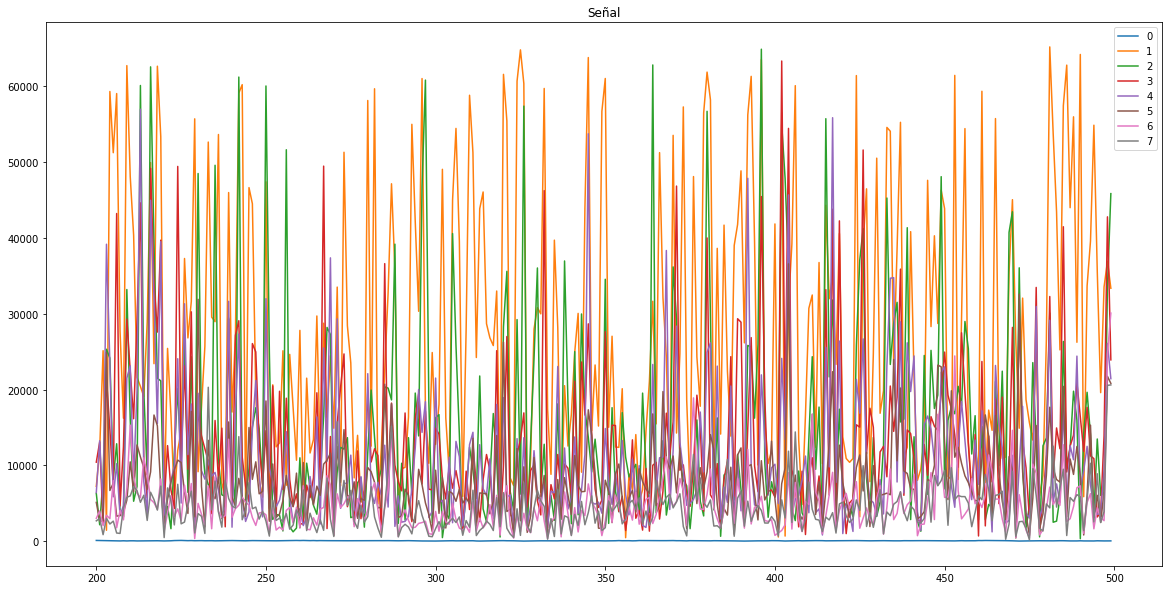

In [11]:
df1[200:500].plot(figsize=(20,10))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

Análisis de datos

In [12]:
signal1=df['atencion']
signal2=df['theta']
signal3=df['low alfa']
signal4=df['high alfa']
signal5=df['low beta']
signal6=df['high beta']
signal7=df['low gamma']
signal8=df['medd gamma'] 
#df1=df.drop(['TIME','EMG2','EMG3'],axis=1)
#df2=df.drop(['TIME','EMG1','EMG3'],axis=1)
#df3=df.drop(['TIME','EMG1','EMG2'],axis=1)

df1=df.drop(['theta','low alfa','high alfa','low beta','high beta','low gamma','medd gamma'],axis=1) #atencion
df2=df.drop(['atencion','low alfa','high alfa','low beta','high beta','low gamma','medd gamma'],axis=1) #theta
df3=df.drop(['atencion','theta','high alfa','low beta','high beta','low gamma','medd gamma'],axis=1) #low alfa
df4=df.drop(['atencion','theta','low alfa','low beta','high beta','low gamma','medd gamma'],axis=1) # high alfa
df5=df.drop(['atencion','theta','low alfa','high alfa','high beta','low gamma','medd gamma'],axis=1)#low beta
df6=df.drop(['atencion','theta','low alfa','high alfa','low beta','low gamma','medd gamma'],axis=1)#high beta
df7=df.drop(['atencion','theta','low alfa','high alfa','low beta','high beta','medd gamma'],axis=1)#low gamma
df8=df.drop(['atencion','theta','low alfa','high alfa','low beta','high beta','low gamma'],axis=1)#high gamma

In [13]:
df[:500].describe()

atencion         theta      low alfa     high alfa      low beta  \
count  500.000000    500.000000    500.000000    500.000000    500.000000   
mean    52.936000  28788.448000  15323.536000  13436.016000  11556.862000   
std     18.856273  18111.054733  13952.377934  10798.829188  10167.609775   
min      1.000000    213.000000    326.000000    625.000000    641.000000   
25%     41.000000  13123.500000   5237.000000   5636.500000   4624.000000   
50%     54.000000  26290.500000  10658.500000  10259.000000   7918.500000   
75%     66.000000  43893.000000  20886.500000  17479.000000  14124.750000   
max     97.000000  65292.000000  64906.000000  63345.000000  57657.000000   

          high beta     low gamma    medd gamma  
count    500.000000    500.000000    500.000000  
mean    8391.690000   4780.302000   4209.138000  
std     6068.940507   3737.440754   3024.569497  
min      302.000000    157.000000     85.000000  
25%     4217.000000   2343.500000   2117.750000  
50%     6849.000000   4173.000000   3658.500000  
75%    10605.000000   6019.250000   5527.250000  
max    40912.000000  30087.000000  20612.000000

Grafica de columnas por sensor

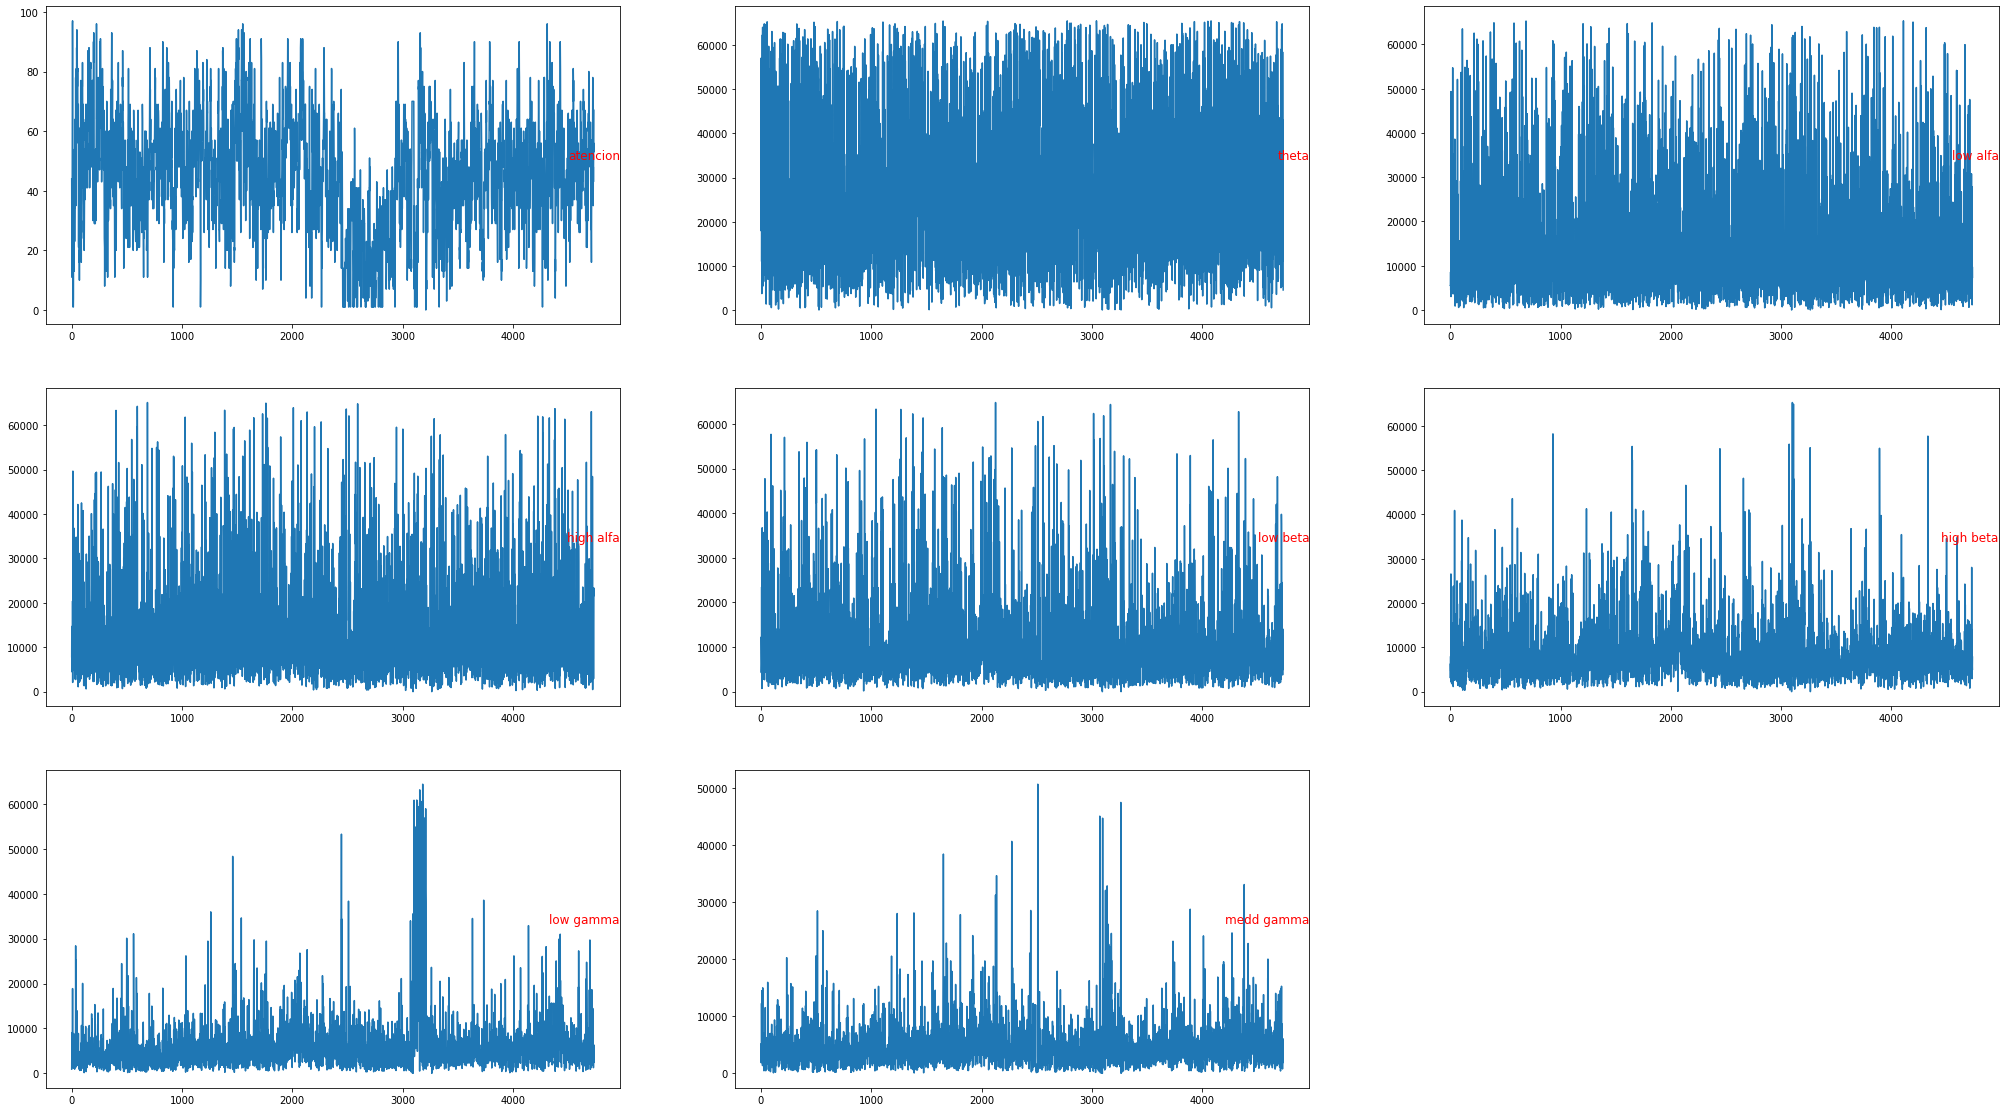

In [14]:

groups = [0,1,2,3,4,5,6,7]
i = 1
# plot each column
plt.figure(figsize=(35,55))
for group in groups:
	plt.subplot(len(groups),3, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right',color ='red')
	i += 1
plt.show()

Filtro - Suavizado exponencial

In [15]:
from pandas.core.indexes.numeric import Float64Index
from pandas.core.arrays.datetimelike import round_nsint64
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

errores=[]
for i in np.arange(0,1.1,0.1):
  i=round(i,1)
  f1=SimpleExpSmoothing(signal1).fit(smoothing_level=i, optimized=False)
  r1=f1.fittedvalues
  df1['Pronostico alfa='+str(i)]=r1
  
  f2=SimpleExpSmoothing(signal2).fit(smoothing_level=i, optimized=False)
  r2=f2.fittedvalues
  df2['Pronostico alfa='+str(i)]=r2

  f3=SimpleExpSmoothing(signal3).fit(smoothing_level=i, optimized=False)
  r3=f3.fittedvalues
  df3['Pronostico alfa='+str(i)]=r3

  f4=SimpleExpSmoothing(signal4).fit(smoothing_level=i, optimized=False)
  r4=f4.fittedvalues
  df4['Pronostico alfa='+str(i)]=r4

  f5=SimpleExpSmoothing(signal5).fit(smoothing_level=i, optimized=False)
  r5=f5.fittedvalues
  df5['Pronostico alfa='+str(i)]=r5

  f6=SimpleExpSmoothing(signal6).fit(smoothing_level=i, optimized=False)
  r6=f6.fittedvalues
  df6['Pronostico alfa='+str(i)]=r6

  f7=SimpleExpSmoothing(signal7).fit(smoothing_level=i, optimized=False)
  r7=f7.fittedvalues
  df7['Pronostico alfa='+str(i)]=r7

  f8=SimpleExpSmoothing(signal8).fit(smoothing_level=i, optimized=False)
  r8=f8.fittedvalues
  df8['Pronostico alfa='+str(i)]=r8

  

  
  #df['Error alfa= '+str(i)]= df['TIME']-df['Pronostico alfa='+str(i)]
  #df['Error2 alfa= '+str(i)]= pow(df['Error alfa= '+str(i)],2)
  #suma=df['Error2 alfa= '+str(i)].sum()
  #df.plot(x='TIME',y='Pronostico alfa='+str(i),ax=ax)
  #errores.append(suma)

print(errores)

[]


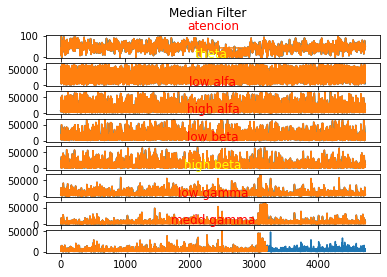

In [16]:
f, plt_arr =plt.subplots(8,sharex=True)
f.suptitle('Median Filter')

plt_arr[0].plot(df1)
plt_arr[0].set_title("atencion", color ='red')

plt_arr[1].plot(df2)
plt_arr[1].set_title("theta ", color ='yellow')

plt_arr[2].plot(df3)
plt_arr[2].set_title("low alfa", color ='red')

plt_arr[3].plot(df4)
plt_arr[3].set_title("high alfa", color ='red')

plt_arr[4].plot(df5)
plt_arr[4].set_title("low beta", color ='red')

plt_arr[5].plot(df6)
plt_arr[5].set_title("high beta", color ='yellow')

plt_arr[6].plot(df7)
plt_arr[6].set_title("low gamma", color ='red')

plt_arr[7].plot(df8)
plt_arr[7].set_title("medd gamma", color ='red')




plt.show()

#df1.plot(figsize=(15,10))
#df2['Pronostico alfa=0.2'].plot(figsize=(15,10))
#df3.plot(figsize=(15,10))

Filtro - Media movil

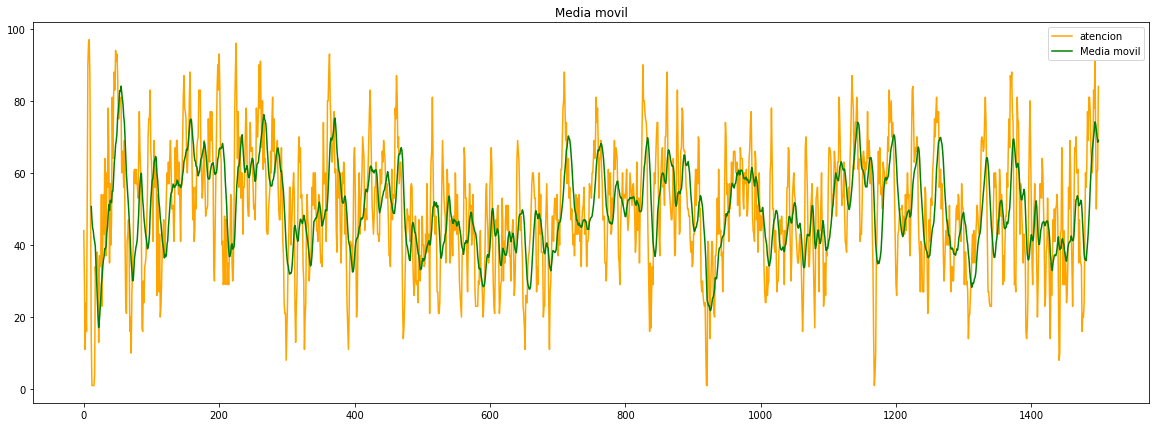

In [17]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()
moving_avg5 = pd.Series(signal5).rolling(window=12).mean()
moving_avg6= pd.Series(signal6).rolling(window=12).mean()
moving_avg7 = pd.Series(signal7).rolling(window=12).mean()
moving_avg8 = pd.Series(signal8).rolling(window=12).mean()


df1['atencion'][:1500].plot(figsize=(20,7),color='orange')
moving_avg1[:1500].plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')


#df1['atencion'][:500].plot(figsize=(20,7),color='blue')
#moving_avg1[:500].plot(label='Media movil',color='red')
#plt.title('Filtro Media movil')
#plt.legend(loc='best')
#ylabel('mV')
#xlabel('t')

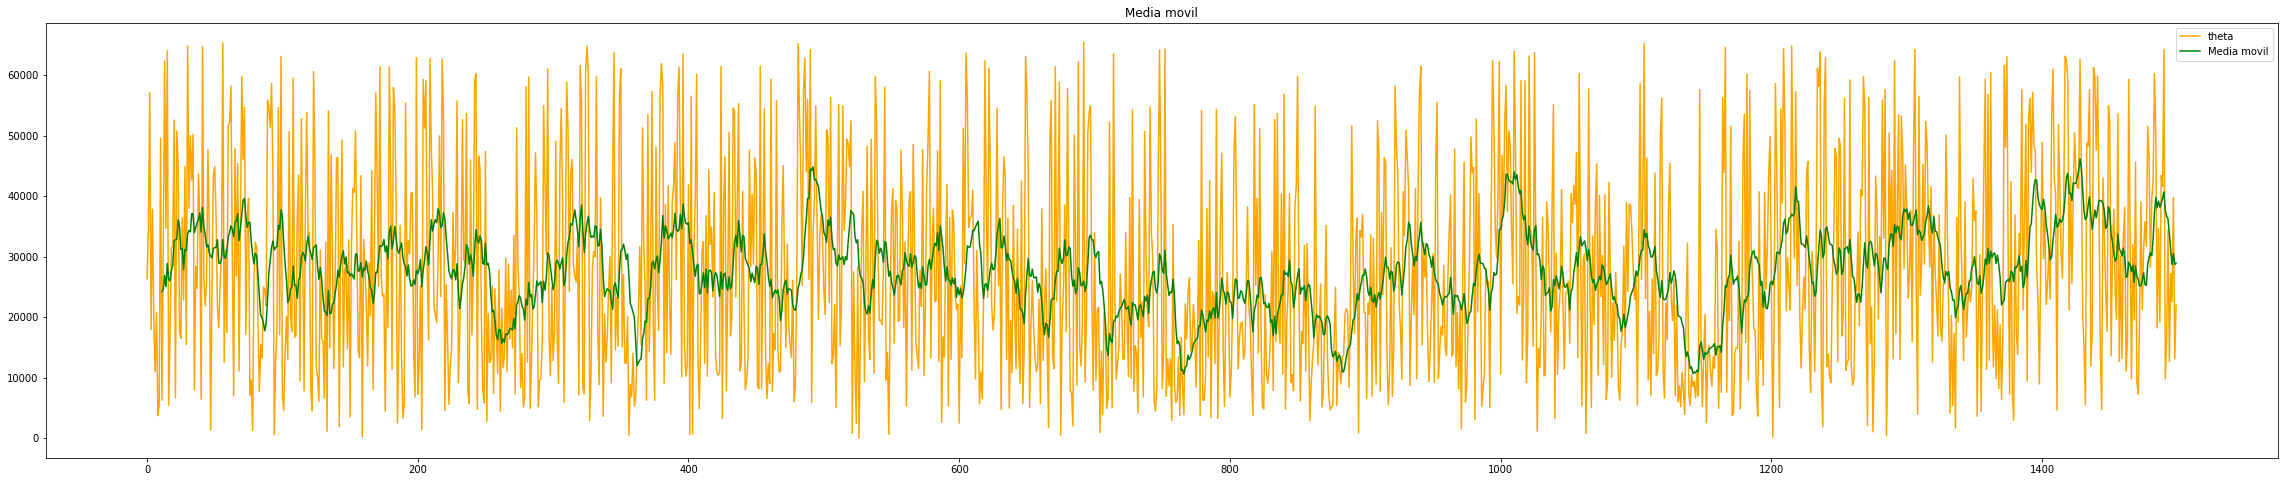

In [18]:
df2['theta'][:1500].plot(figsize=(40,8),color='orange')
moving_avg2[:1500].plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

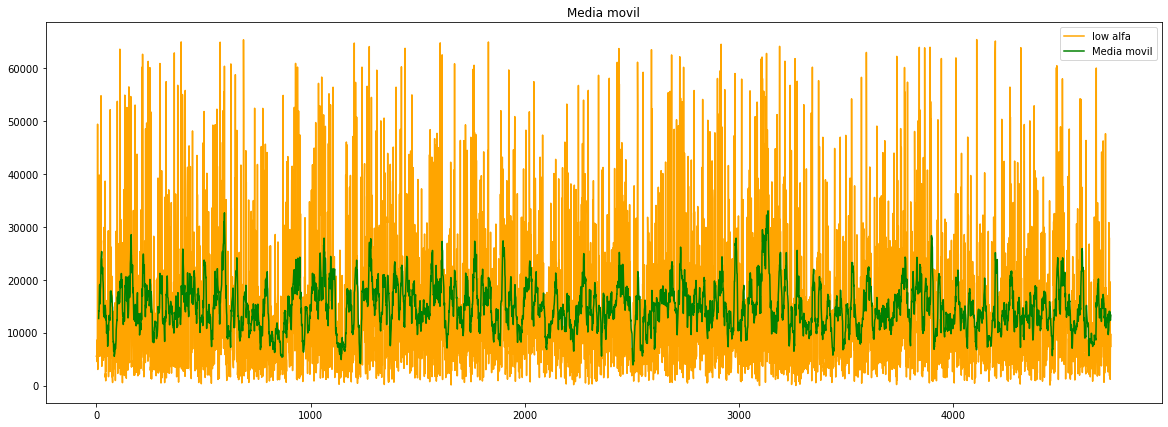

In [19]:
df3['low alfa'].plot(figsize=(20,7),color='orange')
moving_avg3.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')


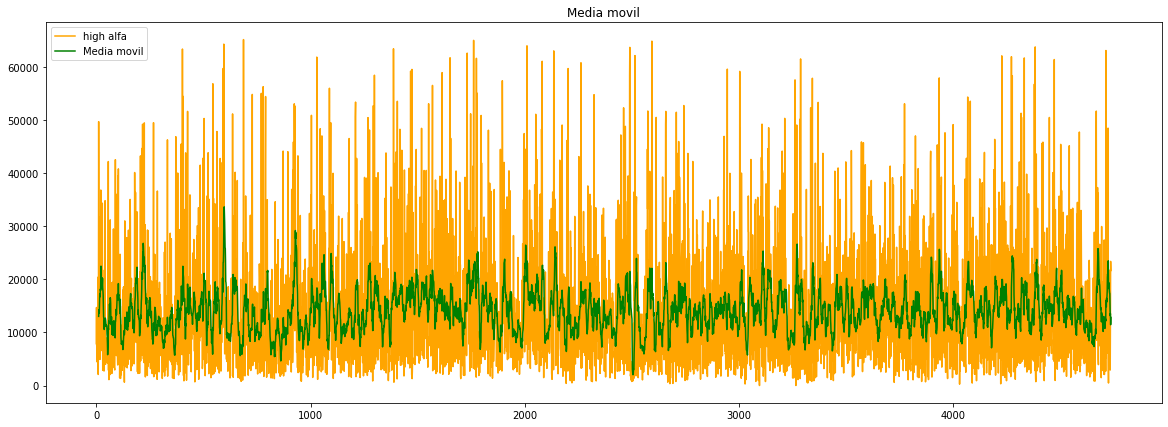

In [20]:
#@title Texto de título predeterminado
variable_name = ""
df4['high alfa'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

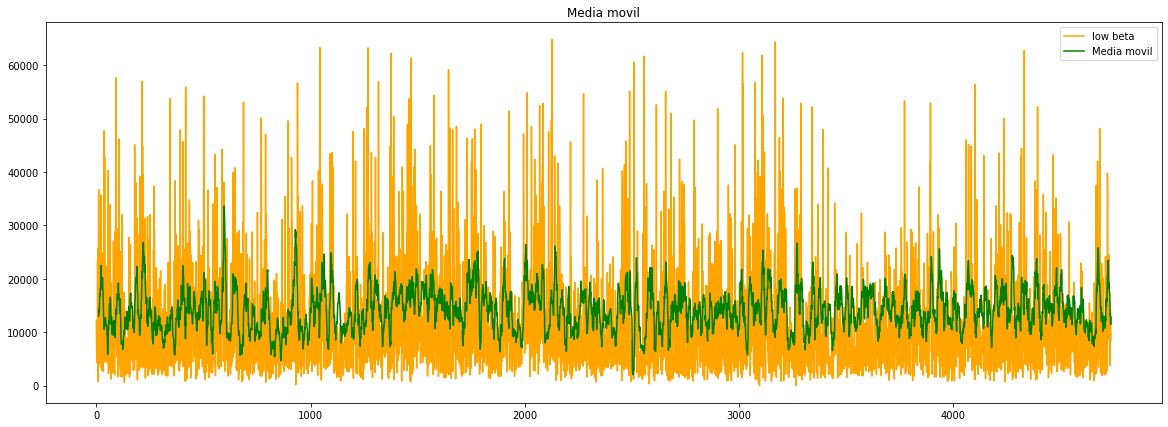

In [21]:
#@title Texto de título predeterminado
variable_name = ""
df5['low beta'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

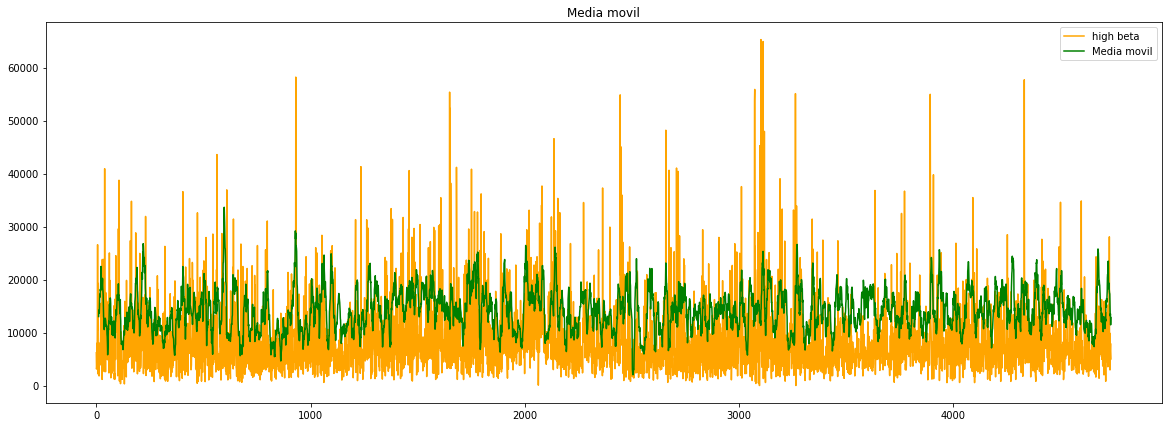

In [22]:
#@title Texto de título predeterminado
variable_name = ""
df6['high beta'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

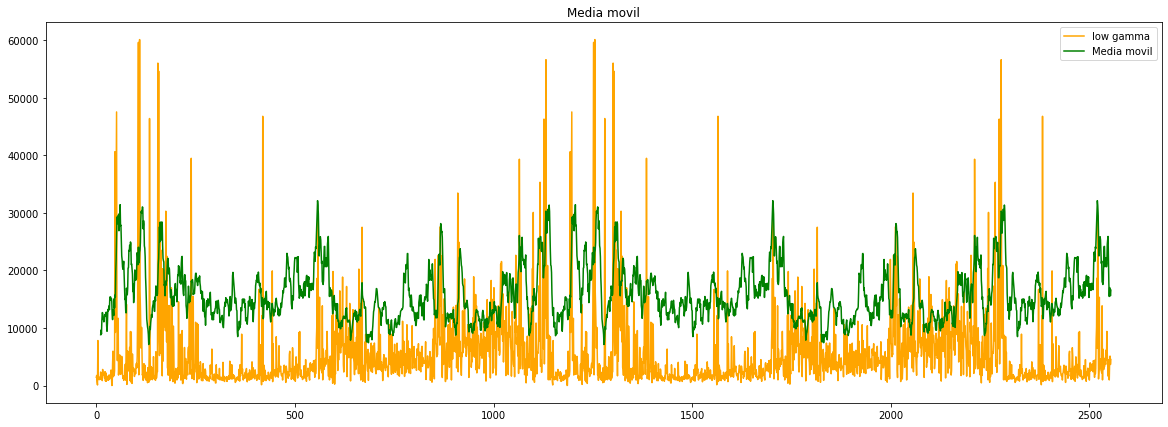

In [ ]:
#@title Texto de título predeterminado
variable_name = ""
df7['low gamma'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

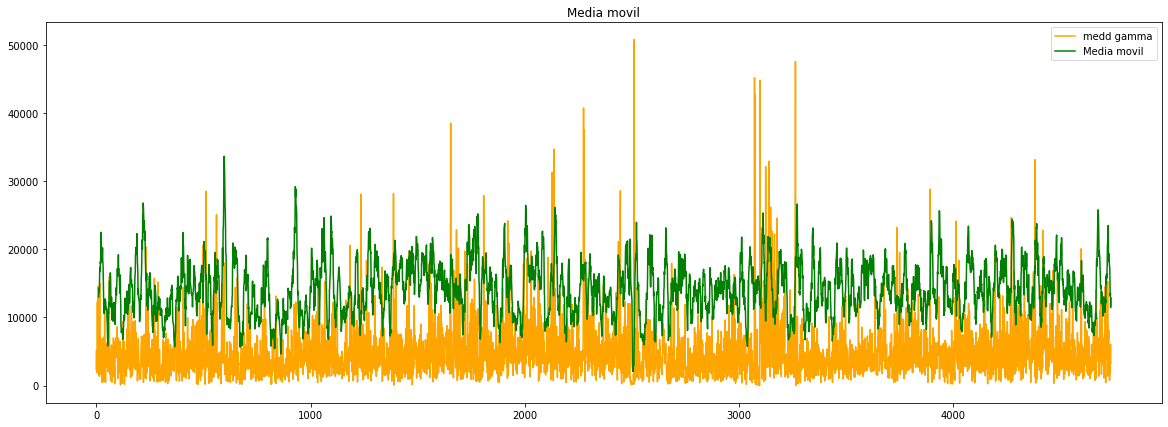

In [23]:
#@title Texto de título predeterminado
variable_name = ""
df8['medd gamma'].plot(figsize=(20,7),color='orange')
moving_avg4.plot(label='Media movil',color='green')
plt.title('Media movil')
plt.legend(loc='best')

In [24]:
df9=pd.DataFrame()
df9['atencion']=moving_avg1
df9['theta']=moving_avg2
df9['low alfa']=moving_avg3
df9['high alfa']=moving_avg4
df9['low beta']=moving_avg5
df9['high beta']=moving_avg6
df9['low gamma']=moving_avg7
df9['medd gamma']=moving_avg8
df5[30:50].head()
#Genera una matrix nueva
df9.to_csv('MediaMovil.csv')
df9.describe()

atencion         theta      low alfa     high alfa      low beta  \
count  4725.000000   4725.000000   4725.000000   4725.000000   4725.000000   
mean     45.305679  27380.804744  14858.510053  14151.531605  11085.239965   
std      14.056059   5516.798555   4360.389229   3875.434110   3633.578524   
min       3.000000  10561.333333   3894.416667   2053.166667   3074.750000   
25%      37.500000  23794.250000  11789.750000  11345.166667   8342.833333   
50%      45.833333  27272.333333  14408.833333  13989.250000  10522.916667   
75%      54.583333  30971.500000  17681.833333  16643.000000  13379.583333   
max      84.083333  48649.083333  32993.166667  33632.500000  23858.000000   

          high beta     low gamma    medd gamma  
count   4725.000000   4725.000000   4713.000000  
mean    8494.527231   6191.389136   4874.793762  
std     2576.795390   4192.124802   1817.915902  
min     2464.333333   1884.500000    244.666667  
25%     6718.416667   4479.083333   3723.166667  
50%     8125.583333   5357.166667   4556.250000  
75%     9768.333333   6544.583333   5626.750000  
max    25056.833333  45161.666667  17237.500000

**Filtro - Savitzky golay**:



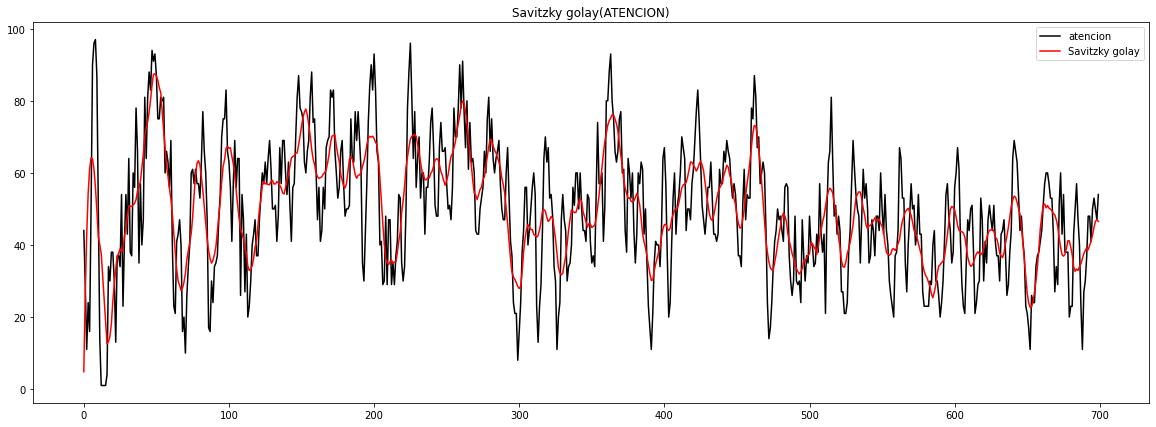

In [25]:
#@title Texto de título predeterminado
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
#5,2
#51,3

SG1=savgol_filter(signal1, 21, 3)
df1['atencion']=SG1
SG2=savgol_filter(signal2, 21, 3)
df2['theta']=SG2
SG3=savgol_filter(signal3, 21, 3)
df3['low alfa']=SG3
SG4=savgol_filter(signal4, 21, 3)
df4['high alfa']=SG4
SG5=savgol_filter(signal5, 21, 3)
df5['low beta']=SG5
SG6=savgol_filter(signal6, 21, 3)
df6['high beta']=SG6
SG7=savgol_filter(signal7, 21, 3)
df7['low gamma']=SG7
SG8=savgol_filter(signal8, 21, 3)
df8['medd gamma']=SG8

#df1['SG1'][:500].plot(figsize=(20,7),color='blue')
signal1[:700].plot(figsize=(20,7),label='atencion',color='black')
df1['atencion'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay(ATENCION)')
plt.legend(loc='best')
#moving_avg1



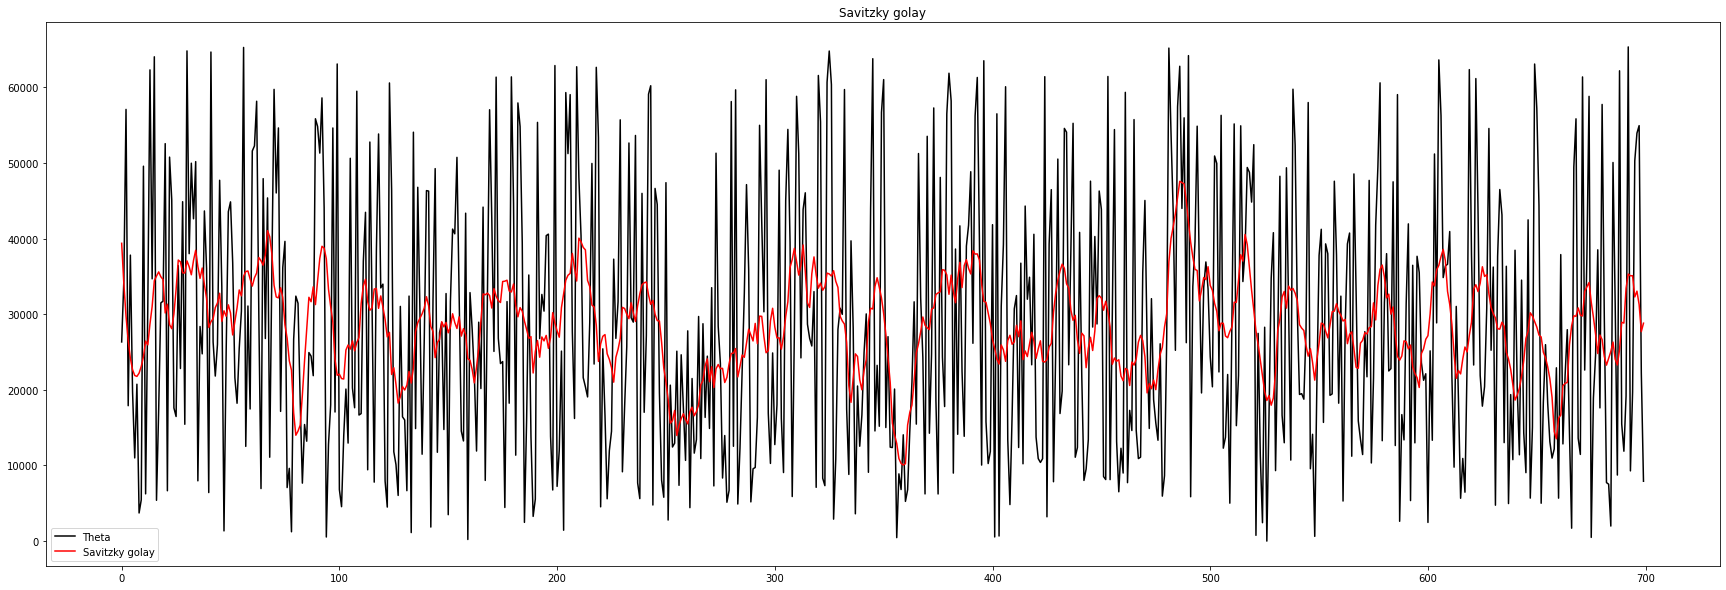

In [26]:
variable_name = "theta"
#df2['SG2'].plot(figsize=(25,10),color='violet')
signal2[:700].plot(figsize=(30,10),label='Theta',color='black')
df2['theta'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')
#moving_avg2

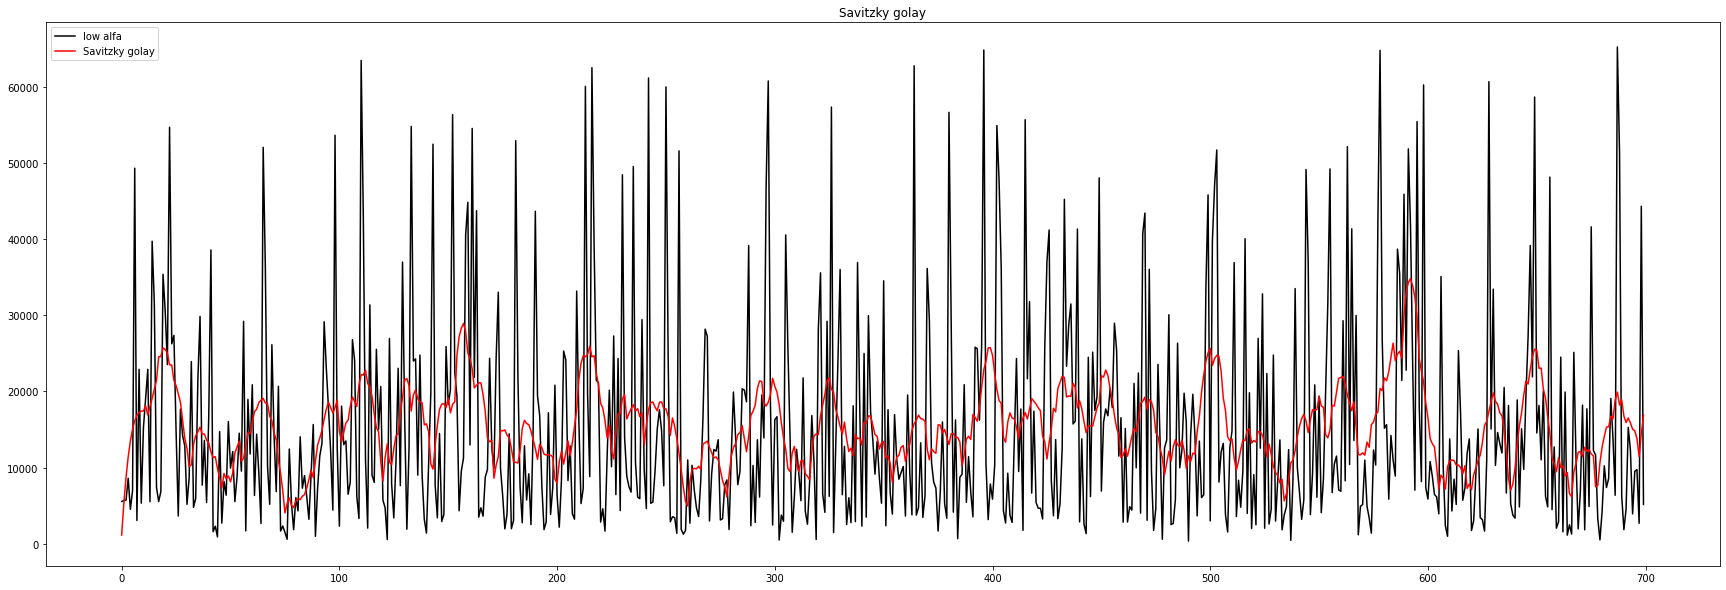

In [27]:
#@title Texto de título predeterminado
variable_name = "low alfa"
#df3['SG3'][:500].plot(figsize=(25,10),color='violet')
signal3[:700].plot(figsize=(30,10),label='low alfa',color='black')
df3['low alfa'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

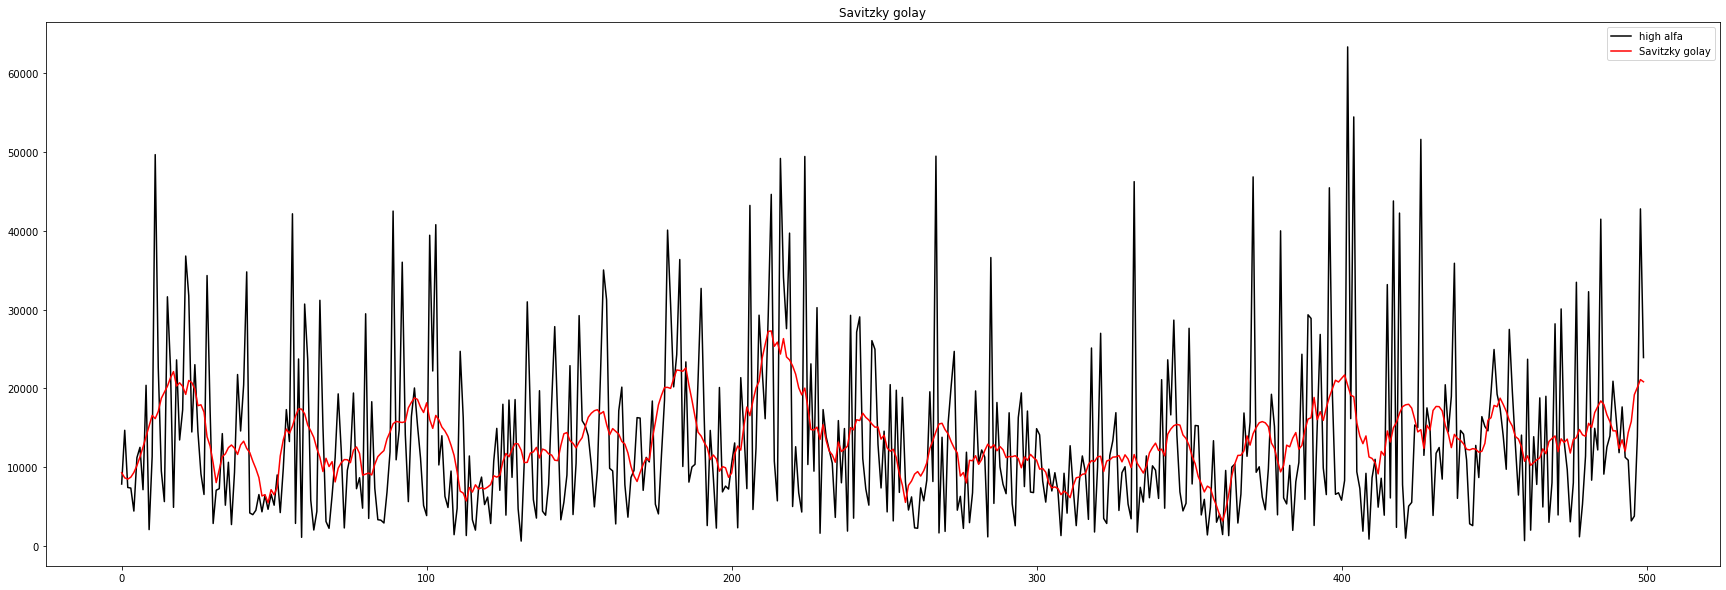

In [28]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal4[:500].plot(figsize=(30,10),label='high alfa',color='black')
df4['high alfa'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

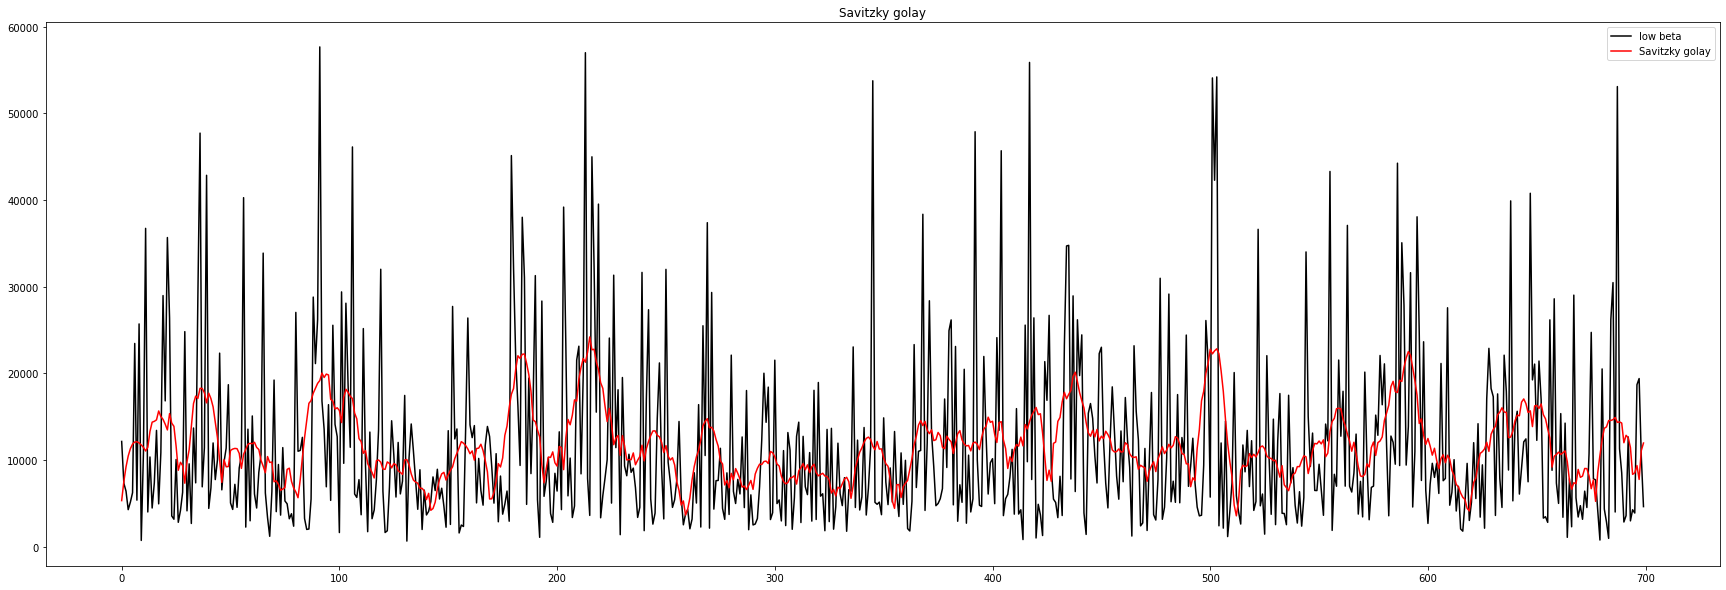

In [29]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal5[:700].plot(figsize=(30,10),label='low beta',color='black')
df5['low beta'][:700].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

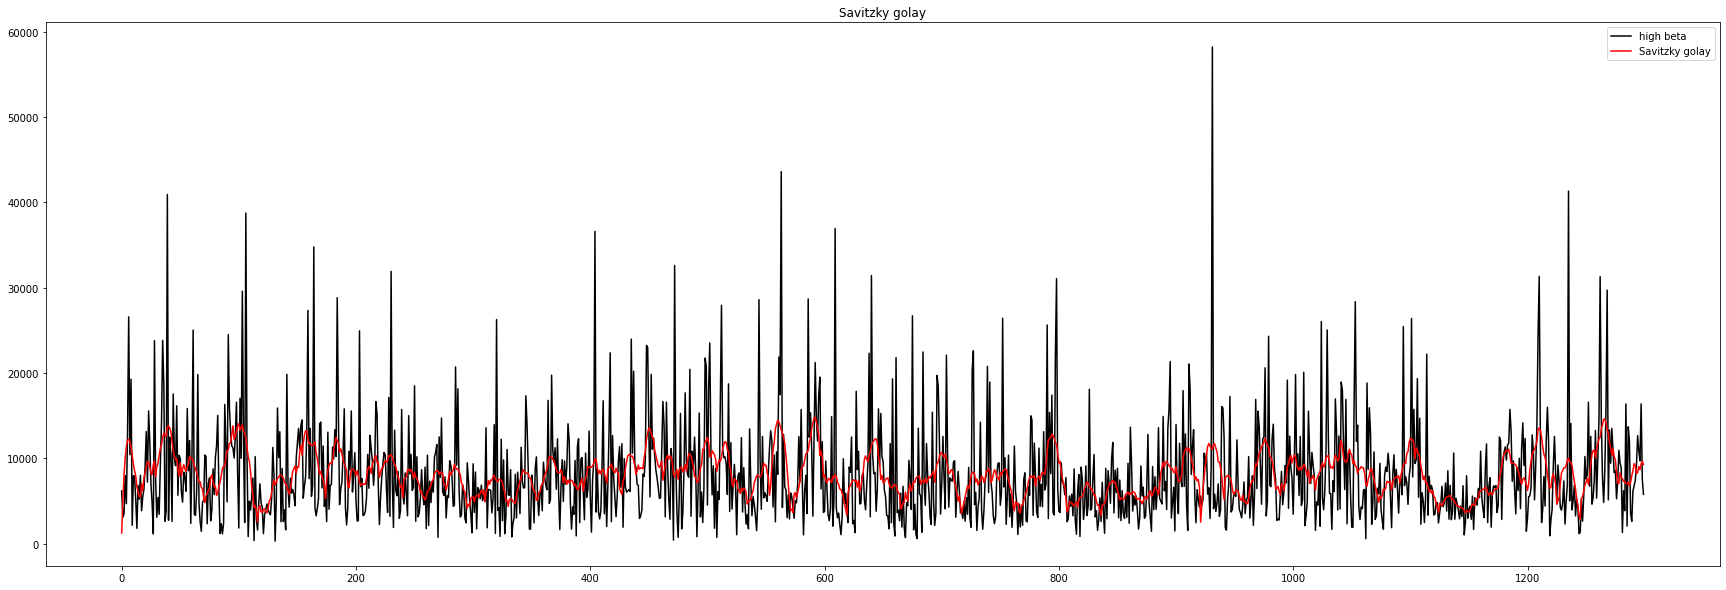

In [30]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal6[:1300].plot(figsize=(30,10),label='high beta',color='black')
df6['high beta'][:1300].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

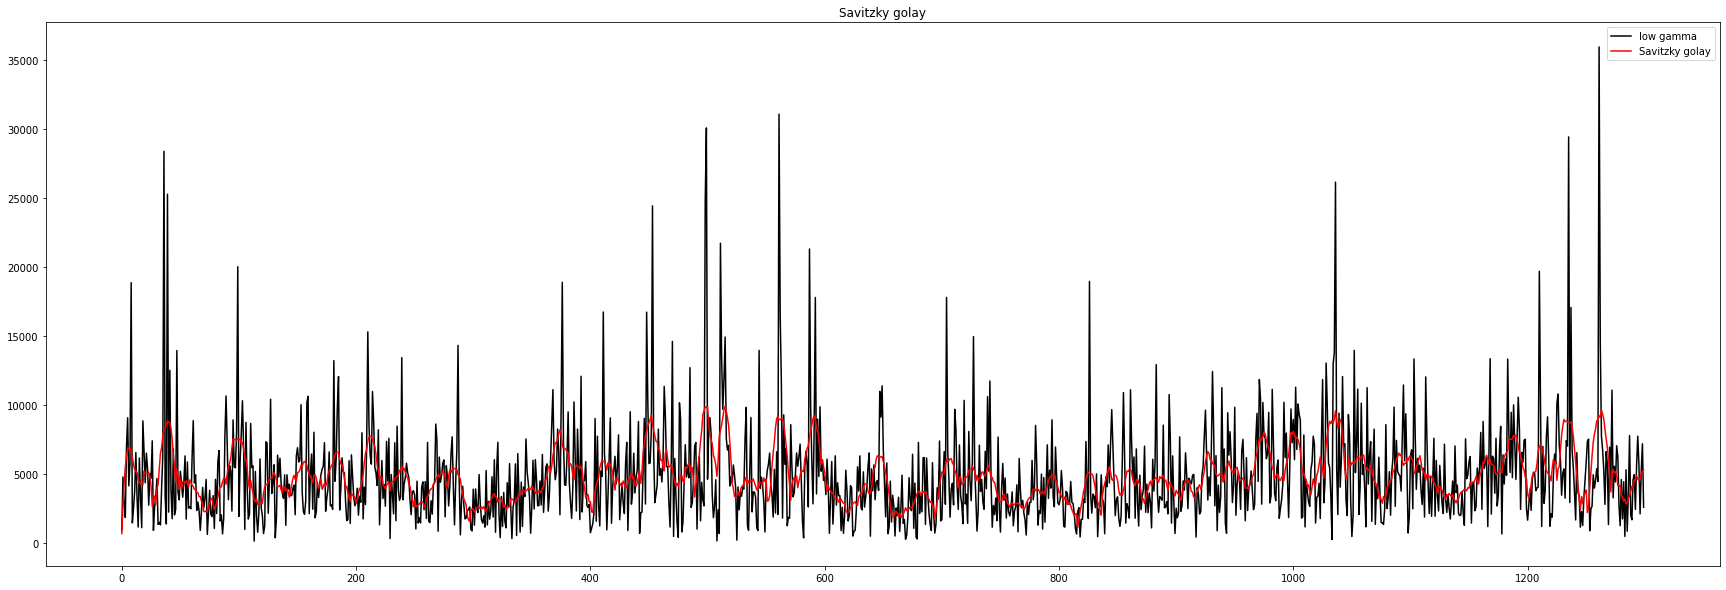

In [31]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal7[:1300].plot(figsize=(30,10),label='low gamma',color='black')
df7['low gamma'][:1300].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

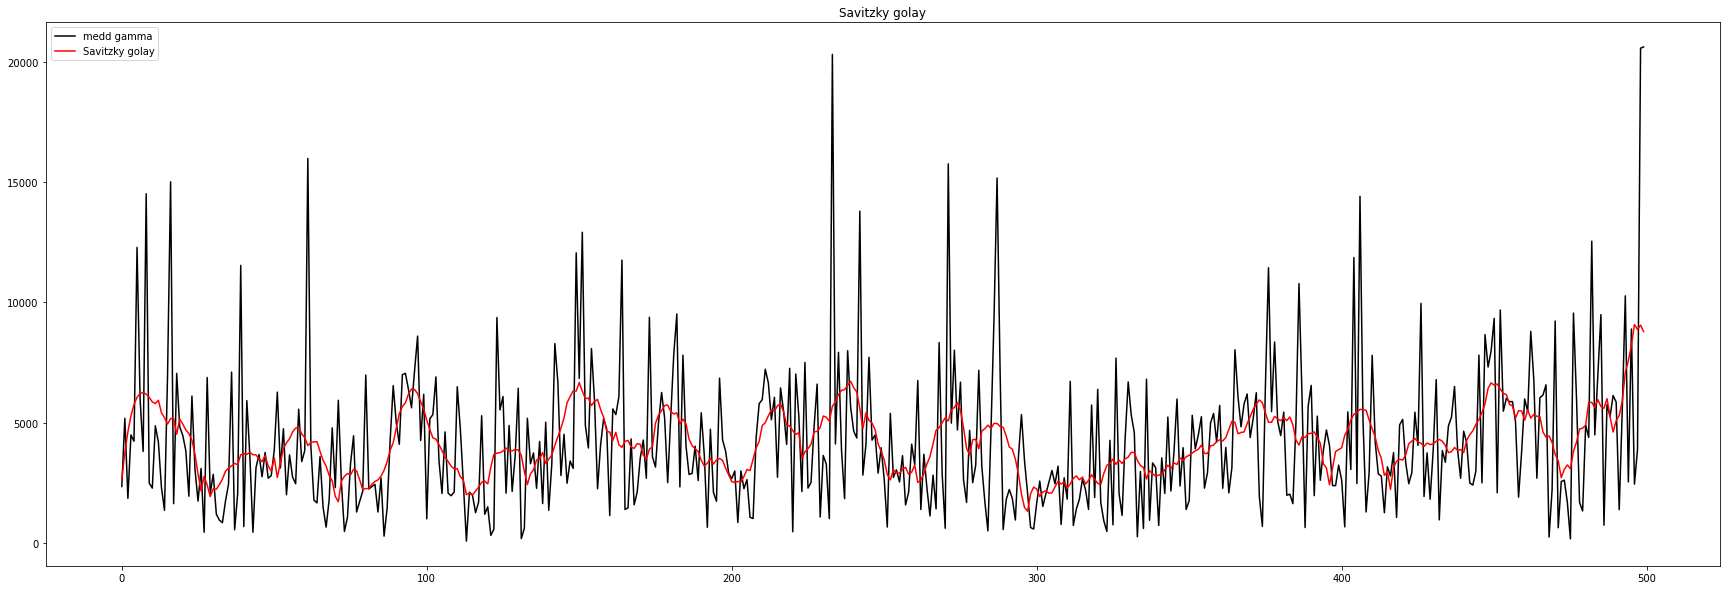

In [32]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal8[:500].plot(figsize=(30,10),label='medd gamma',color='black')
df8['medd gamma'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

In [34]:
#@title Texto de título predeterminado
df9=pd.DataFrame()
df9['atencion']=SG1
df9['theta']=SG2
df9['low alfa']=SG3
df9['high alfa']=SG4
df9['low beta']=SG5
df9['high beta']=SG6
df9['low gamma']=SG7
df9['medd gamma']=SG8
df9[30:50].head()
#Genera una matrix nueva
df9.to_csv('VBDDFSG.csv')
df9.describe()

atencion         theta      low alfa     high alfa      low beta  \
count  4736.000000   4736.000000   4736.000000   4736.000000   4736.000000   
mean     45.315624  27385.000459  14848.732955  14145.164252  11081.092242   
std      14.903565   6141.665474   4869.786264   4353.148842   3967.968423   
min      -0.882968   8040.945080     51.627002  -3019.154953   -526.302059   
25%      36.355672  23356.112046  11471.558679  11041.960935   8158.269124   
50%      45.665414  27294.012913  14423.727035  13946.783916  10516.185682   
75%      55.180451  31350.977689  17946.412962  16980.667784  13555.659202   
max      87.480222  52353.962406  35494.617522  35894.437398  26219.451128   

          high beta     low gamma    medd gamma  
count   4736.000000   4736.000000   4715.000000  
mean    8494.122906   6188.325396   4872.086038  
std     2809.161944   4323.838945   1964.133440  
min     1246.301054   -380.313501  -3183.842759  
25%     6588.813174   4339.719843   3649.454724  
50%     8137.587447   5335.931187   4541.015038  
75%     9945.965920   6624.196143   5708.714940  
max    25322.062439  46802.984636  17926.295848

Filtro FIR

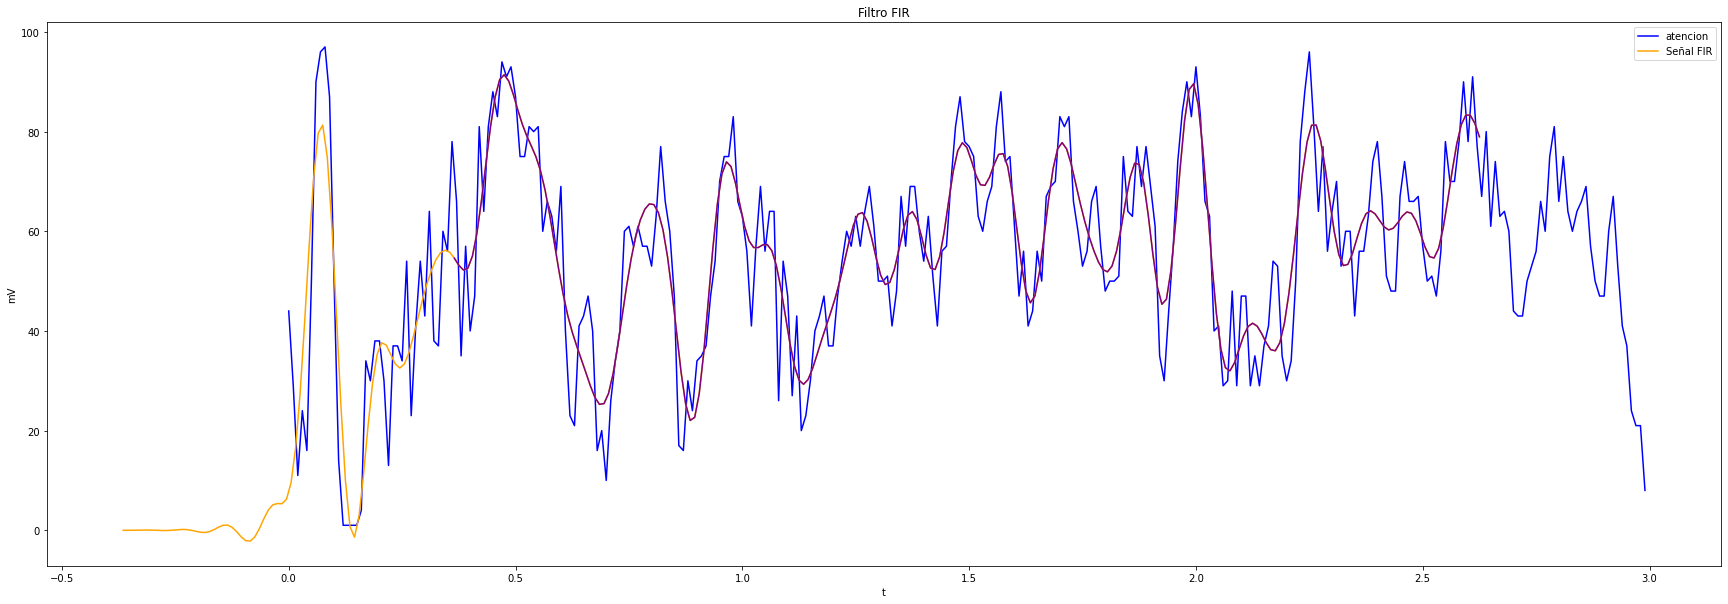

In [35]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal1[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='orange')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('atencion', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()


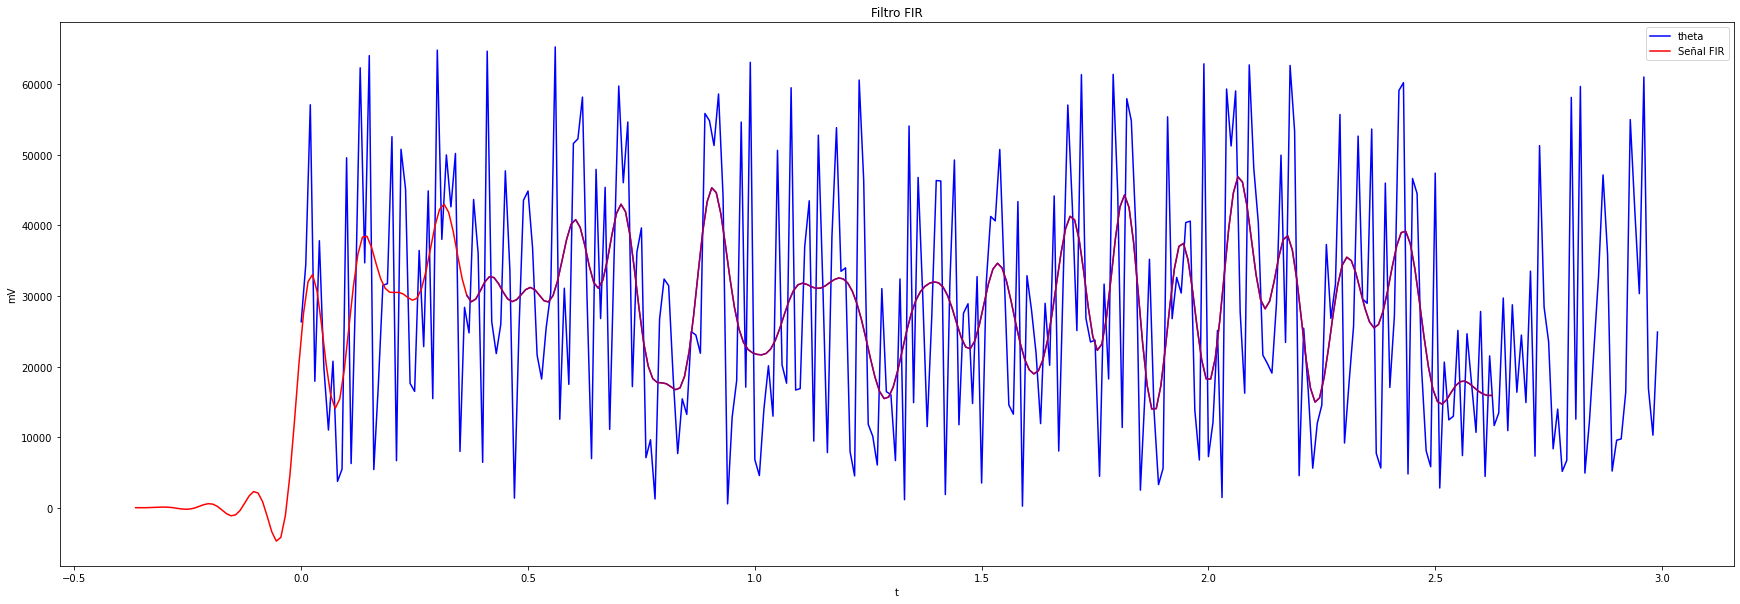

In [36]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal2)
df2['FIR2']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal2[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('theta', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

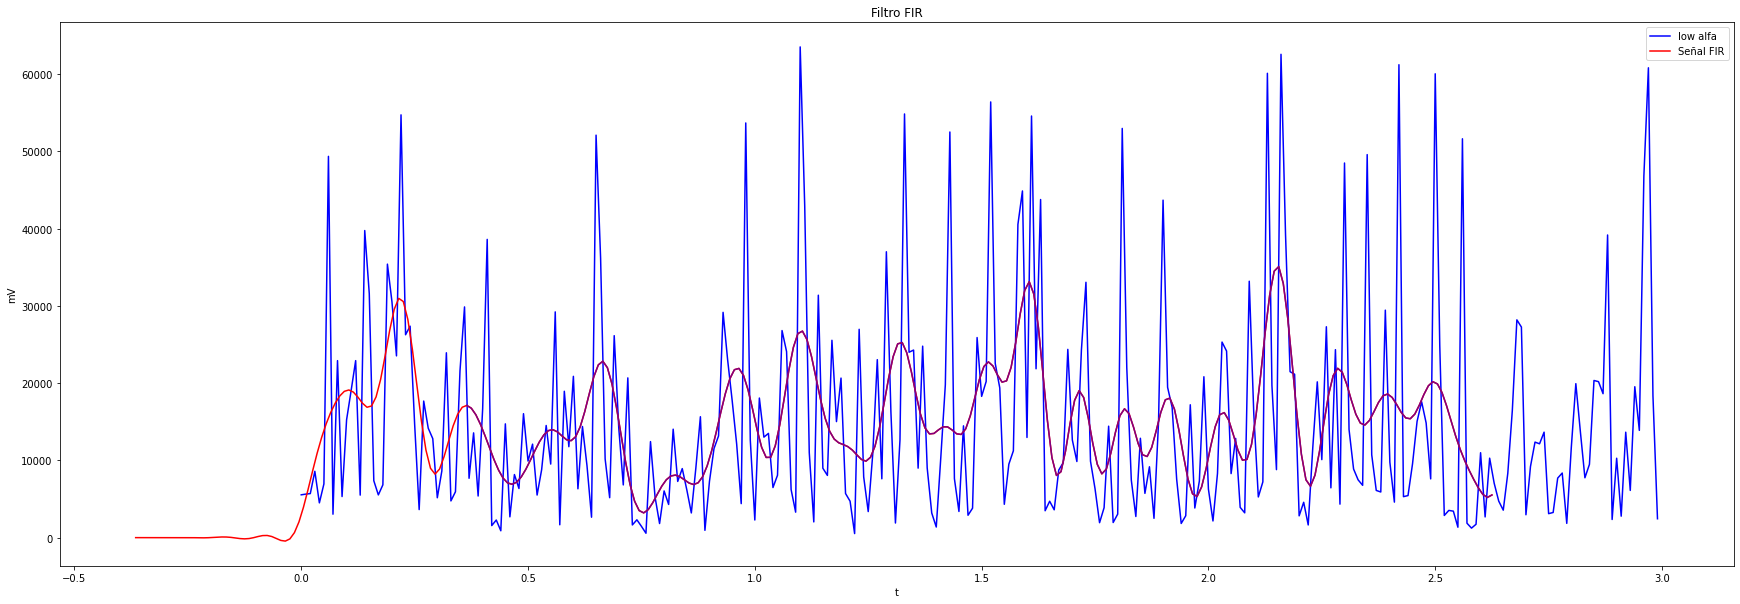

In [37]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal3)
df3['FIR3']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal3[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('low alfa', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

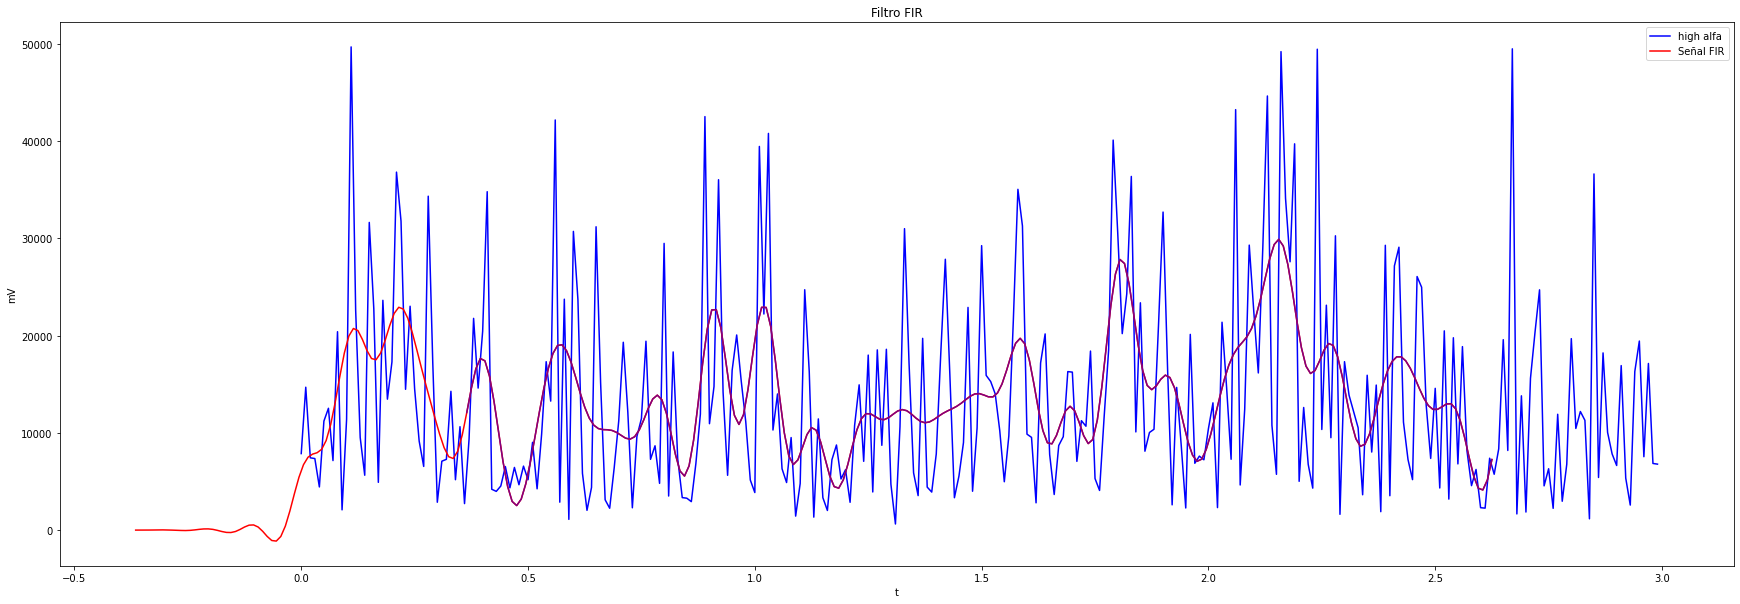

In [38]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal4)
df4['FIR4']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal4[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('high alfa', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

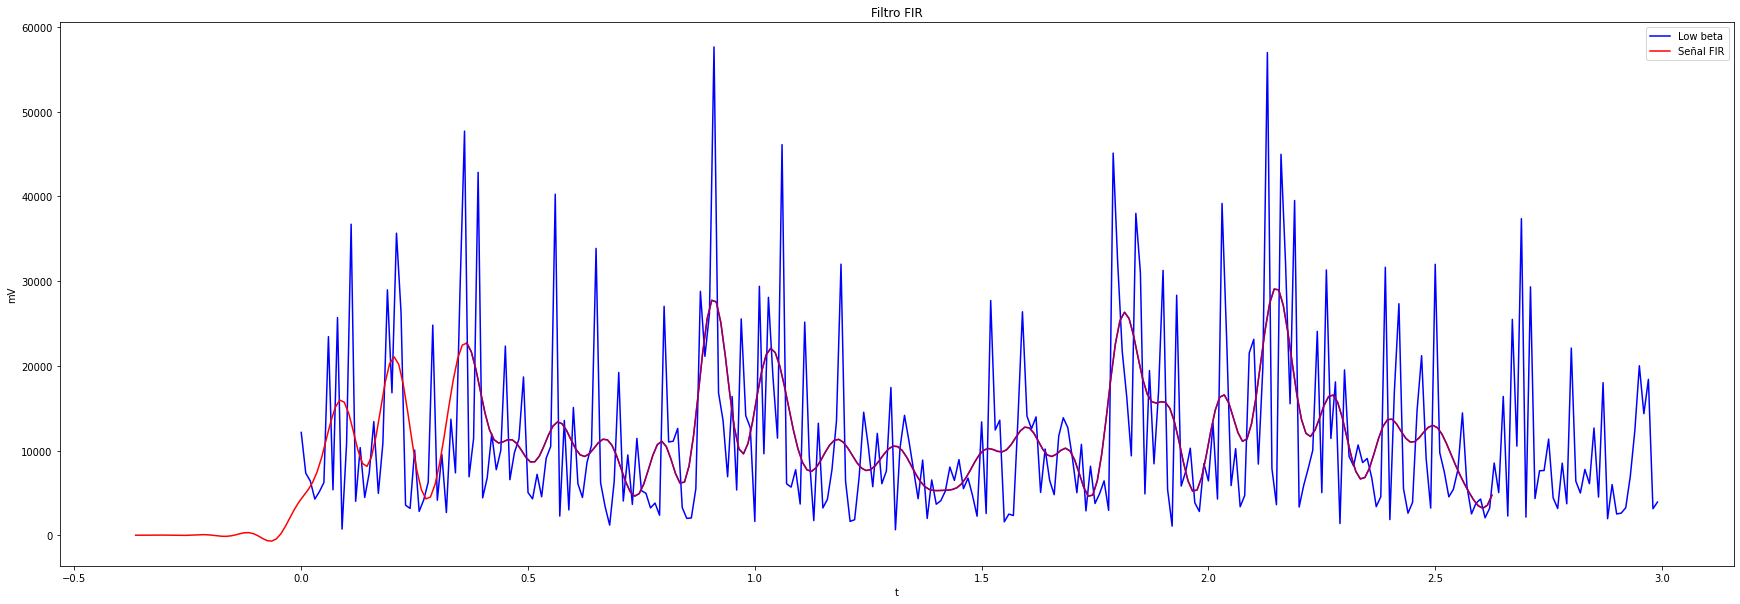

In [39]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal5)
df5['FIR5']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal5[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Low beta', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

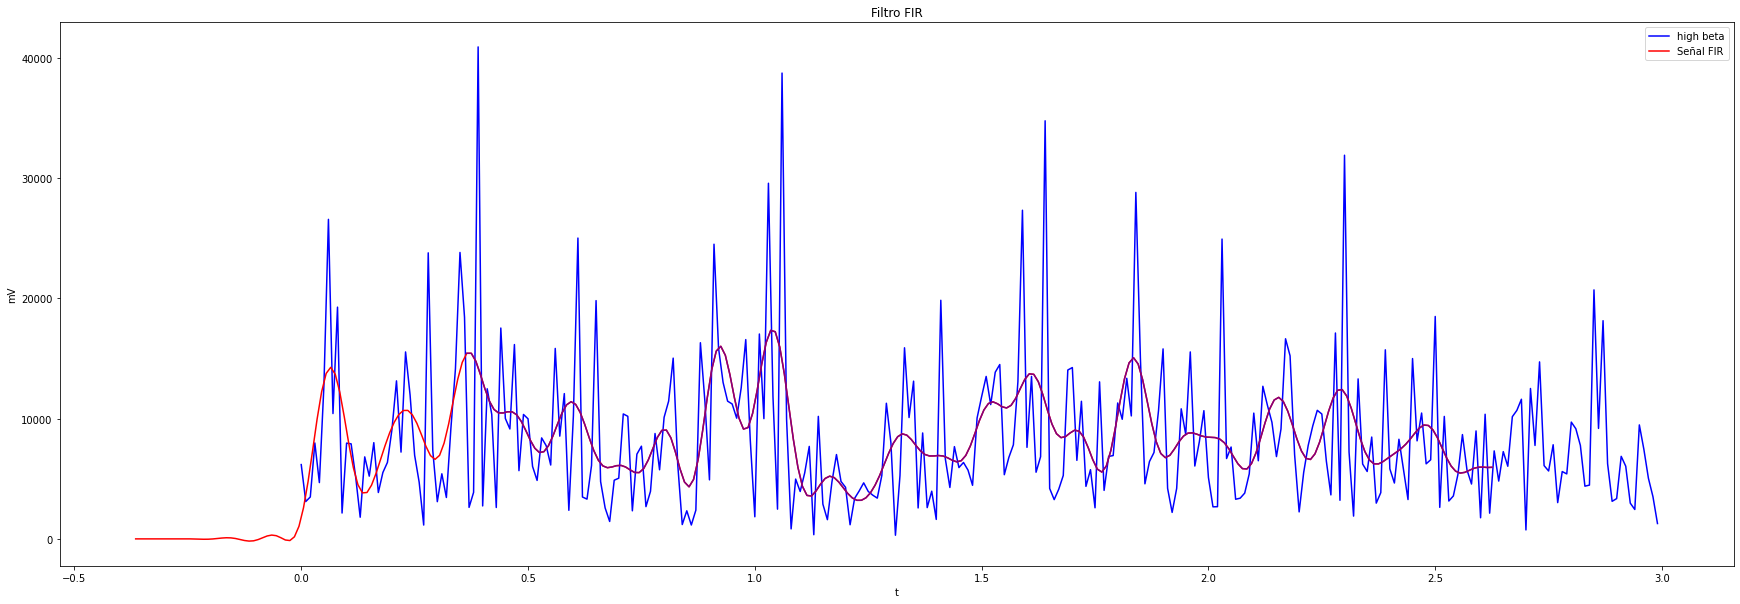

In [40]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal6)
df6['FIR6']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal6[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('high beta', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

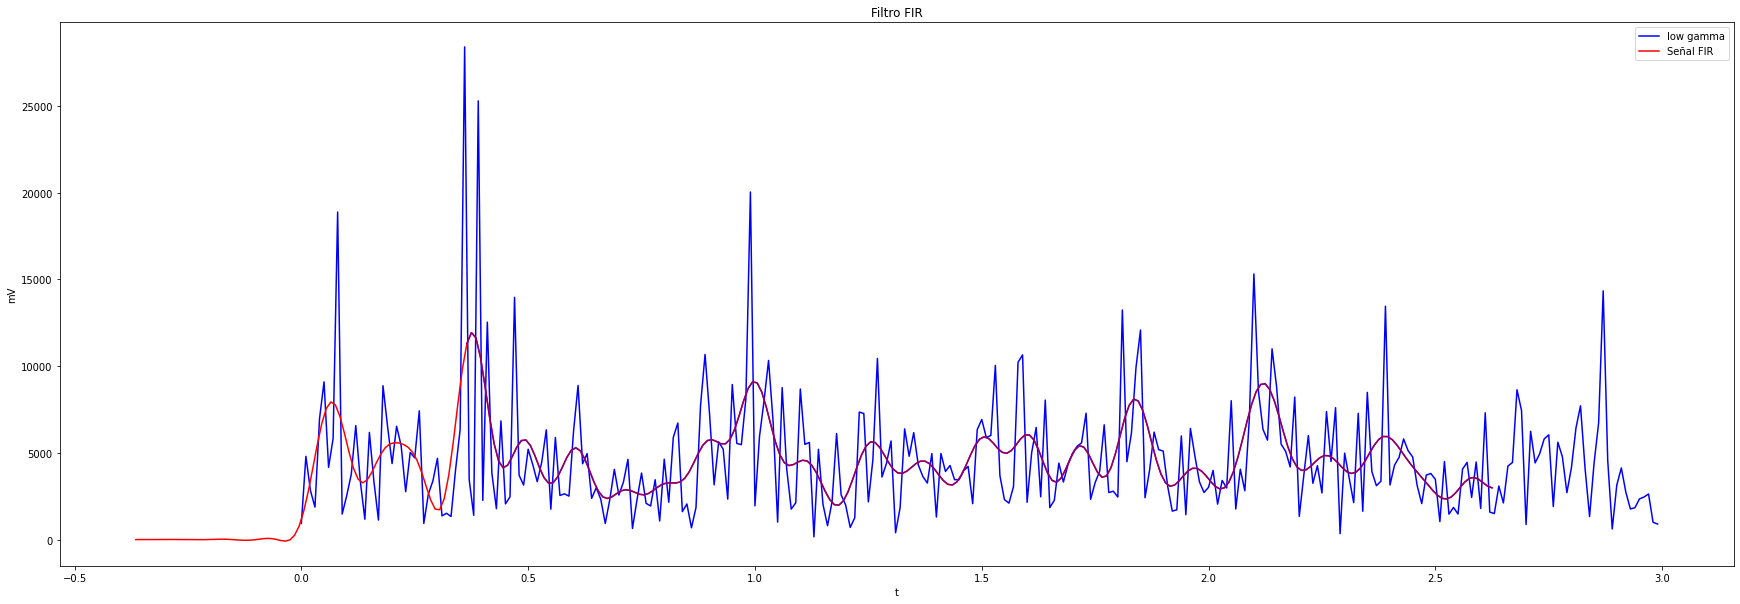

In [41]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal7)
df7['FIR7']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal7[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('low gamma', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

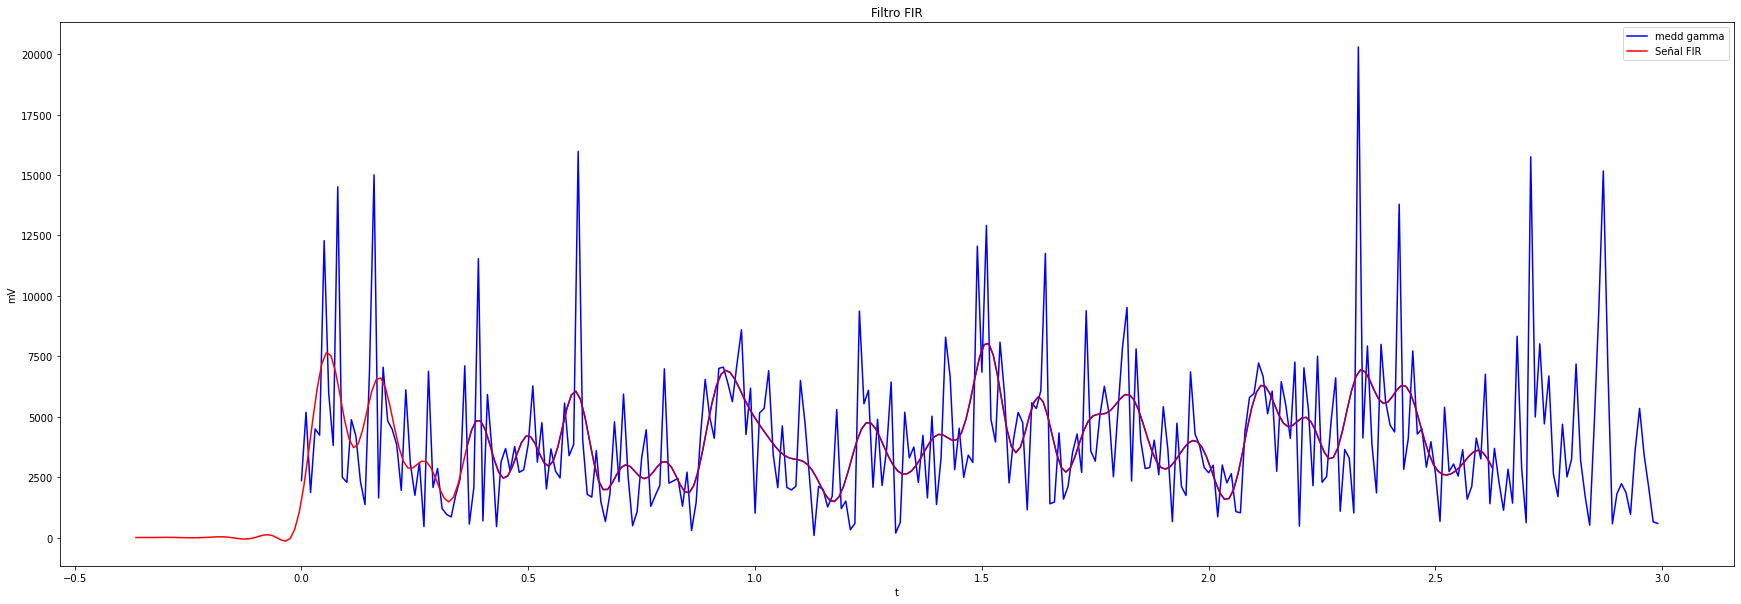

In [42]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal8)
df8['FIR8']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal8[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='purple')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('medd gamma', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

In [44]:
df9=pd.DataFrame()
df9['atencion']=df1['FIR1']
df9['theta']=df2['FIR2']
df9['low alfa']=df3['FIR3']
df9['high alfa']=df4['FIR4']
df9['low beta']=df5['FIR5']
df9['high beta']=df6['FIR6']
df9['low gamma']=df7['FIR7']
df9['medd gamma']=df8['FIR8']

#Genera una matrix nueva
df9.to_csv('VBDDFIR.csv')
df9.describe()

atencion         theta      low alfa     high alfa      low beta  \
count  4736.000000   4736.000000   4736.000000   4736.000000   4736.000000   
mean     44.946669  27148.388880  14757.233663  14024.727037  10993.580208   
std      17.009557   8244.868456   6338.359576   5564.021918   5010.468271   
min      -5.048009  -4738.258084  -2199.104410  -3233.832906   -694.915596   
25%      34.465249  21806.904277  10410.795517  10150.792626   7461.286474   
50%      45.835528  27137.184026  14081.758851  13544.292012  10228.645013   
75%      56.143380  32552.501993  18552.586360  17321.024019  13641.396309   
max      95.263136  58289.205485  41731.589060  39089.724222  36973.570260   

          high beta     low gamma    medd gamma  
count   4736.000000   4736.000000   4662.000000  
mean    8428.577369   6131.315961   4818.244903  
std     3549.743221   4637.571906   2392.215745  
min    -1329.486414   -104.621026  -2815.583598  
25%     6067.847976   4077.568096   3372.839374  
50%     7856.581673   5176.559937   4421.618885  
75%    10212.213167   6660.685779   5794.471535  
max    31493.333620  49817.875025  24610.142282